In [88]:
#Importing all the necessary libraries
import random
import string # to process standard python strings

import os
import string
import regex as re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Performance Metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from wordcloud import WordCloud # To display WordCloud

import warnings
warnings.filterwarnings('ignore')

# Tensorflow Library
import tensorflow as tf
from tensorflow.keras.datasets import imdb # Loading Data
from tensorflow.keras.preprocessing.sequence import pad_sequences # Preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, Flatten
from tensorflow.keras.backend import clear_session
print(tf.__version__)

2.9.1


#  Part A

# 1. Import and analyse the data set. [5 Marks] 
#    Hint: - Use `imdb.load_data()` method
#          - Get train and test set
#          - Take 10000 most frequent words
# 2. Perform relevant sequence adding on the data. [5 Marks]
# 3. Perform following data analysis: [5 Marks]
#    • Print shape of features and labels
#    • Print value of any one feature and it's label
# 4. Decode the feature value to get original sentence [5 Marks]
# 5. Design, train, tune and test a sequential model. [5 Marks]
#    Hint: The aim here Is to import the text, process it such a way that it can be taken as an inout to the ML/NN classifiers. Be analytical and experimental here in trying new approaches to design the best model.
# 6. Use the designed model to print the prediction on any one sample. [5 Marks

In [56]:
top_words = 10000
max_len = 500
embedding_size = 32

# 1. Import and analyse the data set. 

In [60]:
# Loading the dataset but only keep the top 10000 words, zero the rest
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [61]:
# Merging data to create features, labels and DataFrame
X = np.concatenate((X_train, X_test), axis=0) # Features
y = np.concatenate((y_train, y_test), axis=0) #Labels

data_raw = pd.DataFrame({'Review': X, 'Sentiment': y}) #DataFrame
data_raw.sample(5)

,Review,Sentiment
9680,"[1, 1028, 790, 1502, 9, 6, 55, 52, 5, 55, 821,...",1
47522,"[1, 2, 47, 93, 6, 394, 1379, 20, 12, 287, 4, 3...",0
46575,"[1, 43, 373, 45, 220, 1297, 15, 19, 105, 5, 11...",0
47228,"[1, 13, 1059, 14, 22, 33, 35, 2824, 11, 3653, ...",1
12285,"[1, 1812, 2693, 7647, 9, 34, 230, 4, 1529, 155...",1


Observations : Reviews is already preprocessed and sentiments are in binary format.

In [62]:
# Summarizing dataset size
print("Total training data shape: ")
print("-" * 30)
print("Features: ", X.shape)
print("Labels: ", y.shape)

Total training data shape: 
------------------------------
Features:  (50000,)
Labels:  (50000,)


Observations : Total of 50000 movie reviews.

In [63]:
# Summarizing number of labels
print("Labels: ", np.unique(y))

Labels:  [0 1]


In [64]:
# Summarizing label count
data_raw['Sentiment'].value_counts()

1    25000
0    25000
Name: Sentiment, dtype: int64

Observations : The two sentiments are distributed equally in the dataset.

In [65]:
# Summarizing number of words 
print("Number of words: ", len(np.unique(np.hstack(X))))

Number of words:  9998


Average Review length: 234.76
Standard Deviation: 172.91


<AxesSubplot:>

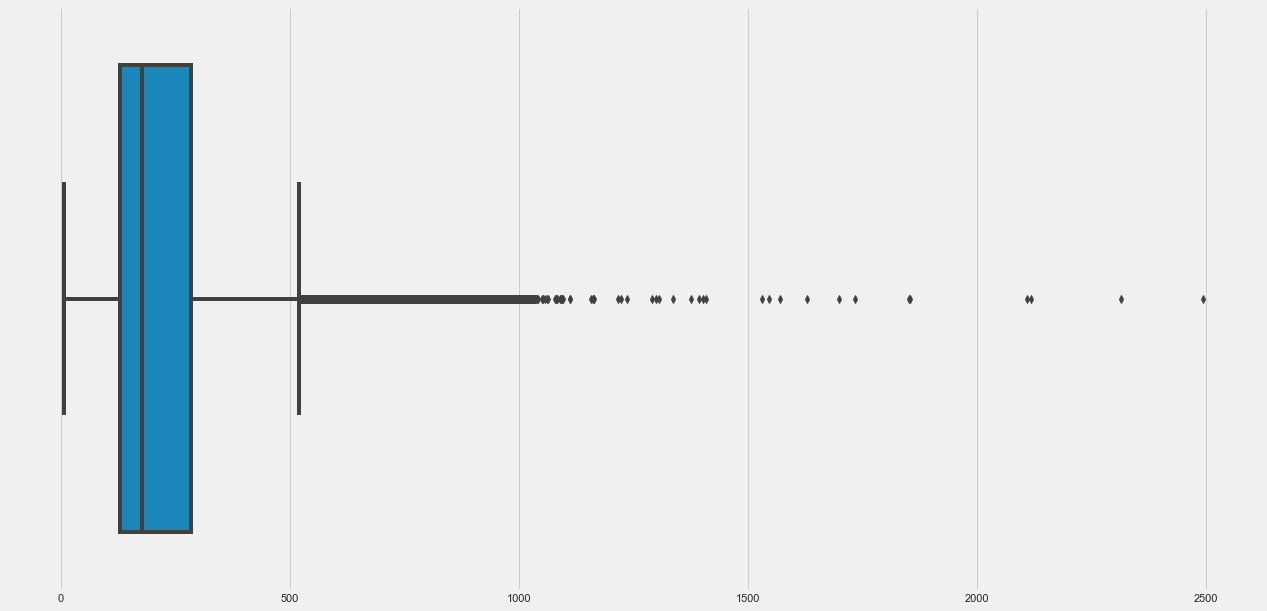

In [66]:
# Summarizing review length
length = [len(x) for x in X]
print("Average Review length: %.2f" % np.mean(length))
print("Standard Deviation: %.2f" % np.std(length))

# Plotting review length
plt.style.use('fivethirtyeight')
plt.figure(figsize= (20,10))
sns.boxplot(length)

Observations : Range of review length lies between 0 and 525

# 2. Perform relevant sequence adding on the data

In [67]:
# pad dataset to a maximum review length in words
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# 3. Perform following data analysis:

# a.Print shape of features and labels.

In [69]:
print("Shape of features: ", X.shape)
print("-" * 30)
print("Shape of labels: ", y.shape)

Shape of features:  (50000,)
------------------------------
Shape of labels:  (50000,)


# b.Print value of any one feature and it's label.

In [70]:
print("Label:", y[0])
print("-" * 30)
print("Feature: ")
print(X[0])

Label: 1
------------------------------
Feature: 
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


# 4. Decode the feature value to get original sentence.

In [71]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in X[0]] )
print(decoded)

1641221/1641221 [==============================] - 0s 0us/step
# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

# 5. Design, train, tune and test a sequential model.

In [72]:
print("Shape of Training Data: ", X_train.shape)
print('-' * 30)
print("Shape of Testing Data: ", X_test.shape)

Shape of Training Data:  (25000, 500)
------------------------------
Shape of Testing Data:  (25000, 500)


In [73]:
# Base Model Architechture
clear_session()
# Create the model
model = Sequential()
# Input Layer
model.add(Embedding(top_words, embedding_size, input_length=max_len))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3, noise_shape=None, seed=None))
model.add(Flatten())
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.2, noise_shape=None, seed=None))
# Output Layer
model.add(Dense(1, activation='sigmoid'))
# Compling Model
adam_opt = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer= adam_opt, metrics=['accuracy'])
#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 dense (Dense)               (None, 500, 250)          8250      
                                                                 
 dropout (Dropout)           (None, 500, 250)          0         
                                                                 
 flatten (Flatten)           (None, 125000)            0         
                                                                 
 dense_1 (Dense)             (None, 150)               18750150  
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [74]:
batch_size = 128
epochs = 2

In [75]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = epochs, batch_size = batch_size, verbose=2)

Epoch 1/2
196/196 - 115s - loss: 0.5482 - accuracy: 0.6881 - val_loss: 0.3100 - val_accuracy: 0.8731 - 115s/epoch - 588ms/step
Epoch 2/2
196/196 - 200s - loss: 0.2531 - accuracy: 0.9064 - val_loss: 0.2939 - val_accuracy: 0.8820 - 200s/epoch - 1s/step


In [77]:
# Final evaluation of the model
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print('Train Accuracy: %.3f%%' % (acc*100))
print('Train Loss: %.3f'% loss)
print("-" * 30)

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f%%' % (acc*100))
print('Test Loss: %.3f'% loss)

Train Accuracy: 94.936%
Train Loss: 0.151
------------------------------
Test Accuracy: 88.196%
Test Loss: 0.294


In [78]:
# Predicting for all of test dataset 
predictions = model.predict(X_test)
predictions[0]

782/782 [==============================] - 21s 26ms/step


array([0.15855809], dtype=float32)

In [79]:
# Inversing probability into test labels
rounded = [round(x[0]) for x in predictions]
predictions = rounded

Text(0.5, 1.0, 'Accuracy Score: 0.88196')

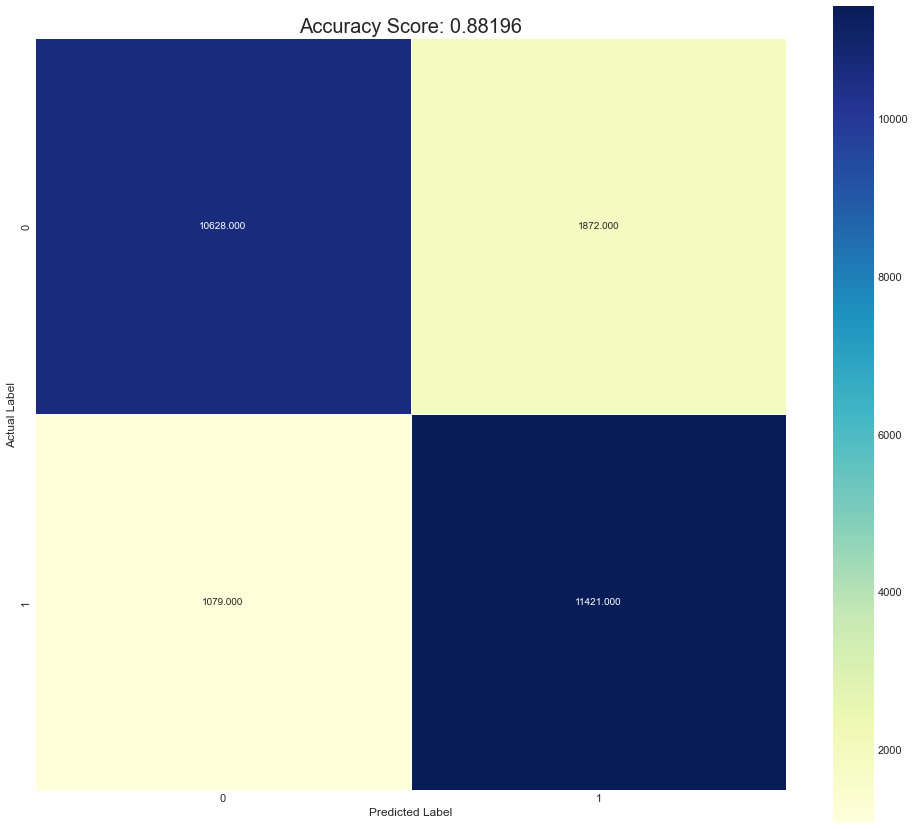

In [80]:
# Confusion Matrix

cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot = True, fmt = '.3f', linewidths = .5, square = True, cmap="YlGnBu")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,predictions))
plt.title(all_sample_title, size = 20)

Observations :
    1. About 1300 labels are wrongly classified in 0.
    2. About 1600 labels are wrongly classified in 1.

In [81]:
# Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88     12500
           1       0.86      0.91      0.89     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



Observations :-  f1-score for 0's and 1's are same. Also macro avg f1-score is same to accuracy and weighted avg f1-score.

In [82]:
# Plotting History
def plot_history(history):
    # Storing Accuracies and Losses data of Training and Validation
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    # Features settings for plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.xlabel('Epoch ==>')
    plt.ylabel('Accuracy (%) ==>')
    plt.plot(x, acc, 'c', label='Training acc')
    plt.plot(x, val_acc, 'm', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.xlabel('Epoch ==>')
    plt.ylabel('Loss ==>')
    plt.plot(x, loss, 'c', label='Training loss')
    plt.plot(x, val_loss, 'm', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

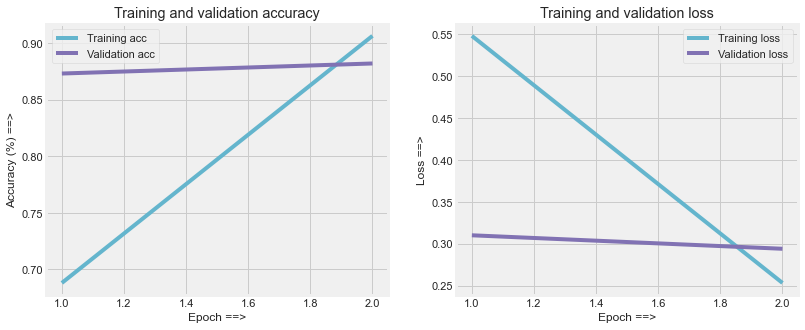

In [83]:
plot_history(history)

Observations :- From the above plot it can be concluded that this model has low learning rate and has a little problem of overfitting

# 6. Use the designed model to print the prediction on any one sample.

In [84]:
# Creating word dictionary for comparing with the random input sample
word_dict = imdb.get_word_index()
word_dict = { key:(value + 3) for key, value in word_dict.items() }
word_dict[''] = 0  # Padding
word_dict['>'] = 1 # Start
word_dict['?'] = 2 # Unknown word
reverse_word_dict = { value:key for key, value in word_dict.items() }

In [85]:
def predict_on_sample(text):
    # Preparing the input by removing punctuation characters, converting characters to lower case, and removing words containing numbers
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = text.lower().split(' ')
    text = [word for word in text if word.isalpha()]

    # Generating an input tensor
    input = [1]
    for word in text:
        if word in word_dict and word_dict[word] < top_words:
            input.append(word_dict[word])
        else:
            input.append(2)
    padded_input = pad_sequences([input], maxlen=max_len)

    # Predicting on sample using the model and returning the result
    result = model.predict(np.array([padded_input][0]))[0][0]

    # Checking the result for Positive or Negative Prediction
    predicted_sentiment = ""
    if round(result) == 1:
      predicted_sentiment = "Predicted Sentiment is Positive"
    else:
      predicted_sentiment = "Predicted Sentiment is Negative" 

    return result, predicted_sentiment

In [86]:
# Passing a random positive movie review of from google for prediction
result, predicted_sentiment = predict_on_sample("This movie, as far as J-Statham films goes, was phenomenal. If you are going into this expecting an action film, you are definitely getting more than you bargained for.")
print("Predicted Probability : ", result)
print("-" * 30)
print(predicted_sentiment)

1/1 [==============================] - 0s 28ms/step
Predicted Probability :  0.81867576
------------------------------
Predicted Sentiment is Positive


In [87]:
# Passing a random negative movie review from google for prediction
result, predicted_sentiment = predict_on_sample("I was completely wrong.  The acting and dialogue were horrible.  Couldn’t decide if the screenwriter hurt the acting or the actors butchered the script.  Both were equally awful.")
print("Predicted Probability : ", result)
print("-" * 30)
print(predicted_sentiment)

1/1 [==============================] - 0s 42ms/step
Predicted Probability :  0.04850476
------------------------------
Predicted Sentiment is Negative


# Conclusion : 
   

 The model is predicting very good on the random sample taken from google for the same movie. This is probably because these reviews contains the words from top 10000 words used from dataset.

# PART B
#   Steps and tasks: [ Total Score: 30 Marks]
#   1. Read and explore the data [3 Marks]
#   2. Retain relevant columns [3 Marks]
#   3. Get length of each sentence [3 Marks]
#   4. Define parameters [3 Marks]
#   5. Get indices for words [3 Marks]
#   6. Create features and labels [3 Marks]
#   7. Get vocabulary size [3 Marks]
#   8. Create a weight matrix using GloVe embeddings [3 Marks]
#   9. Define and compile a Bidirectional LSTM model. [3 Marks]
#      Hint: Be analytical and experimental here in trying new approaches to design the best model.
#   10. Fit the model and check the validation accuracy [3 Marks]

2.9.1


In [4]:
project_path = r"F:/UdemySmallProjects/NLP/Week6-Project2"
os.chdir(project_path)
os.getcwd()

'F:\\UdemySmallProjects\\NLP\\Week6-Project2'

# 1. Read and explore the data.

In [54]:
data_src = 'F:/UdemySmallProjects/NLP/Week6-Project2/archive/Sarcasm_Headlines_Dataset.json'

data_raw = pd.read_json(data_src, lines=True)
data_raw.sample(5)

,article_link,headline,is_sarcastic
24935,https://local.theonion.com/employee-wishes-he-...,employee wishes he had enough job security to ...,1
13025,https://local.theonion.com/groceries-strategic...,groceries strategically placed around checkout...,1
12323,https://www.theonion.com/article-about-return-...,article about return of burger king chicken fr...,1
25882,https://www.huffingtonpost.com/entry/dame-judi...,dame judi dench learning to spit lyrics will m...,0
5012,https://www.theonion.com/mexico-announces-plan...,mexico announces plans to refry over 700 milli...,1


In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [7]:
# Checking for missing values
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(data_raw)

Your selected dataframe has 3 columns and 28619 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


Observations : NO missing values found in this dataset.

In [8]:
data_raw['source'] = data_raw['article_link'].apply(lambda x: re.findall(r'\w+', x)[2]) # Seperating source from the article_link
data_raw.head()

,is_sarcastic,headline,article_link,source
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,theonion
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...,huffingtonpost
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,huffingtonpost
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,theonion
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...,theonion


Labels details and plot:-
------------------------------
0    14985
1    13634
Name: is_sarcastic, dtype: int64
------------------------------


<AxesSubplot:xlabel='is_sarcastic', ylabel='count'>

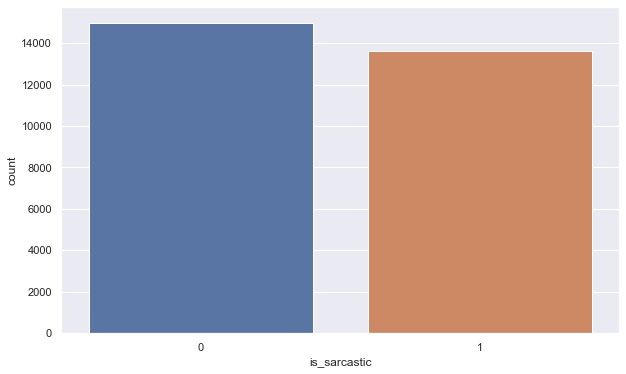

In [9]:
print("Labels details and plot:-")
print("-" * 30)
print(data_raw['is_sarcastic'].value_counts())
print("-" * 30)

plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(data_raw['is_sarcastic'])

# Observations : Unsarcastic data is slightly more than sarcastic one's but overall the dataset is balanced.

Source details and plot:-
------------------------------
huffingtonpost    14985
theonion          13634
Name: source, dtype: int64
------------------------------


<AxesSubplot:xlabel='source', ylabel='count'>

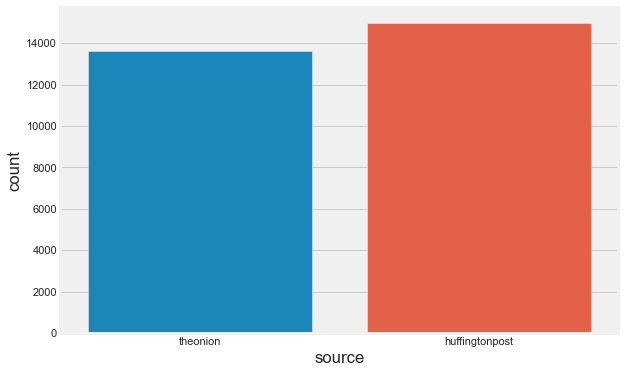

In [10]:
print("Source details and plot:-")
print("-" * 30)
print(data_raw['source'].value_counts())
print("-" * 30)

plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
sns.countplot(data_raw['source'])

Observations :  All of unsarcastic data comes from huffingpost and sarcatic one's comes from theonion

# 2. Retain relevant columns.

In [11]:
data = pd.DataFrame({'Features': data_raw['headline'], 'Labels': data_raw['is_sarcastic']}) #Creating new DataFrame with relevant columns only
data.sample(5)

,Features,Labels
1053,heavily starched shirt only thing keeping larr...,1
10788,watch: gop hopefuls can't answer 'just one que...,0
2075,8 tips for dealing with the loss of a loved one,0
24002,new technologies give government ample means t...,0
4155,once homeless student who worked 4 jobs to sup...,0


Unsarcastic WordCloud
------------------------------


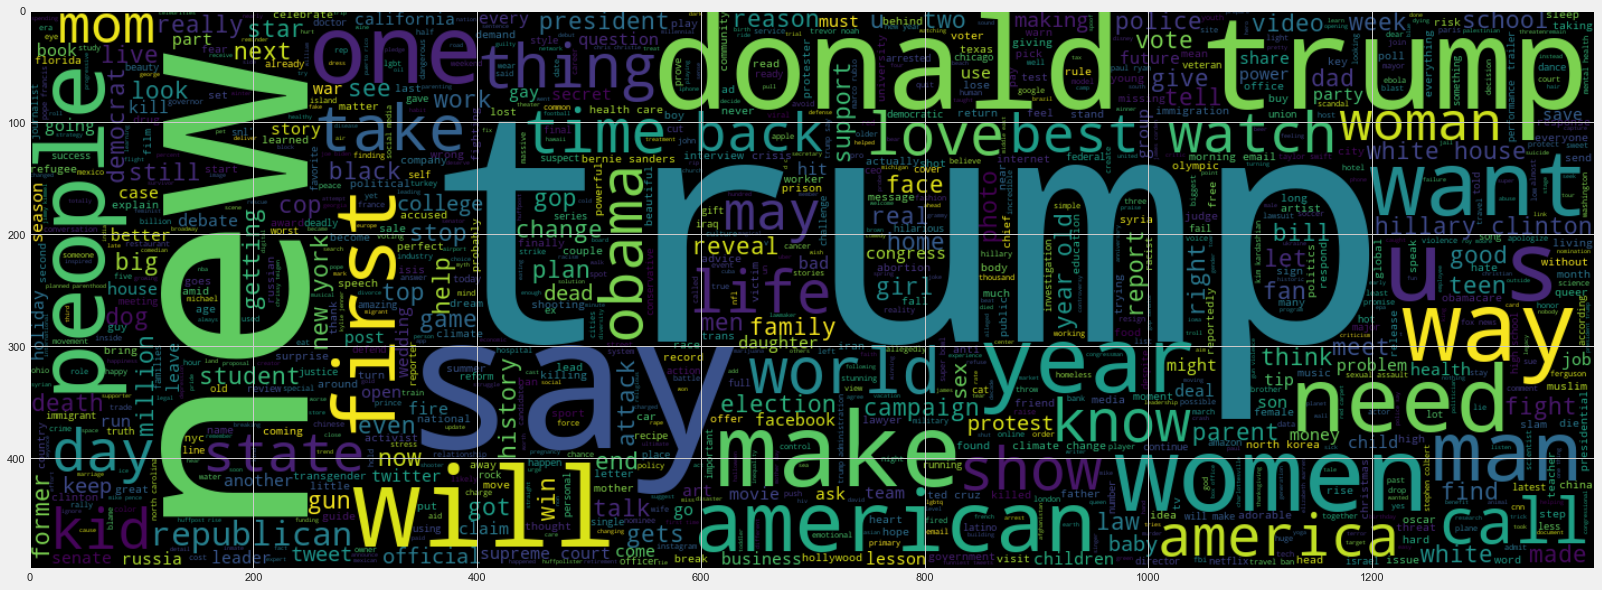

In [12]:

# Unsarcastic WordCloud
print("Unsarcastic WordCloud")
print("-" * 30)
plt.figure(figsize=(25,25))
wordcloud = WordCloud(max_words = 1000, width = 1400, height=500).generate(" ".join(data[data.Labels==0].Features))
plt.imshow(wordcloud,interpolation='bilinear')

Sarcastic WordCloud
------------------------------


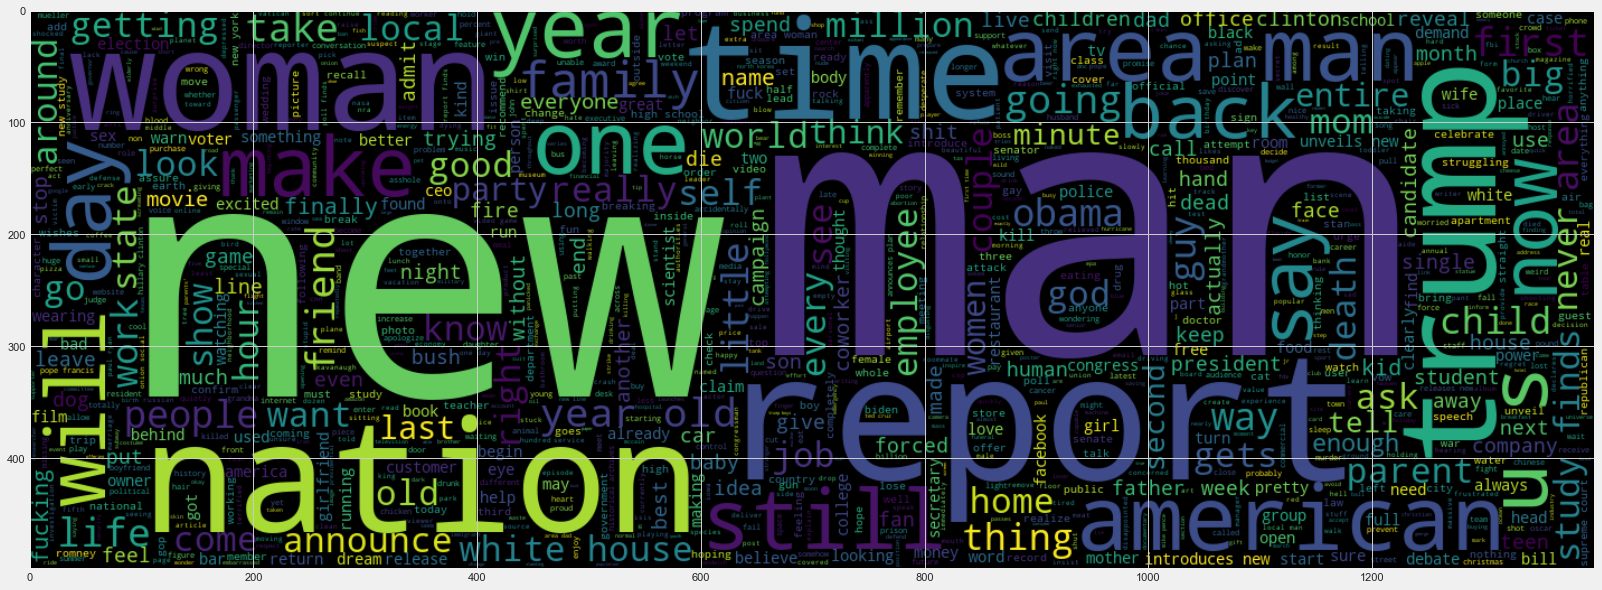

In [13]:
# Sarcastic WordCloud
print("Sarcastic WordCloud")
print("-" * 30)
plt.figure(figsize=(25,25))
wordcloud = WordCloud(max_words = 1000, width = 1400, height=500).generate(" ".join(data[data.Labels==1].Features))
plt.imshow(wordcloud,interpolation='bilinear')

# 3. Get length of each sentence.

In [14]:
# Capturing each sentence lengths
data_raw['sentences_lengths'] = data_raw['headline'].apply(lambda x: len(x))
data_raw.head(5)

,is_sarcastic,headline,article_link,source,sentences_lengths
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...,theonion,61
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...,huffingtonpost,79
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...,huffingtonpost,49
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...,theonion,52
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...,theonion,61


In [15]:
# Sentence length statistics
data_raw['sentences_lengths'].describe()

count    28619.000000
mean        62.308571
std         20.726483
min          7.000000
25%         49.000000
50%         62.000000
75%         75.000000
max        926.000000
Name: sentences_lengths, dtype: float64

Observations :
    
    1. The length of headlines ranges between 7 and 926.
    2. Mean and Standard deviation is around 62. As they are same the distribution will be a normal distribution.
    3. There's a huge difference between the third quartile and max value which suggests presences of large numbers of outliers.

[Text(0.5, 0, 'Sentence Lengths')]

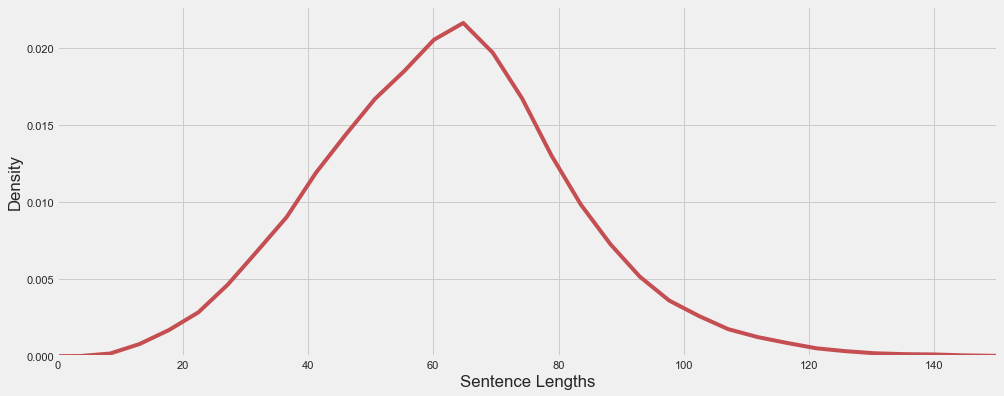

In [16]:
# PLotting sentence length distribution
plt.figure(figsize=(15,6))
plt.xlim(0, 150)

ax = sns.distplot(data_raw['sentences_lengths'], hist=False, color="r")
ax.set(xlabel='Sentence Lengths')

Observations :
    1. Max count of sentence lengths lies between 20 and 120.
    2. Hence we can take 120 or anything between the above range as max_len parameter for pad_sequence.

# 4. Define parameters.

In [17]:
# Hyperparameters
vocab_size = 30000
oov_token = '<00V>'
max_length = 100
padding_type = 'post'
trunc_type = 'post'
embedding_dim = 100
batch_size = 256
num_epochs = 30

# 5. Get indices for words.

In [18]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(data['Features'])
word_index = tokenizer.word_index

X = tokenizer.texts_to_sequences(data['Features'])

print("Indices for words:- ", word_index)
print('-' * 25)
print("Tokenized samples: ")
print('-' * 25)
print(X[0])

Indices for words:-  {'<00V>': 1, 'to': 2, 'of': 3, 'the': 4, 'in': 5, 'for': 6, 'a': 7, 'on': 8, 'and': 9, 'with': 10, 'is': 11, 'new': 12, 'trump': 13, 'man': 14, 'at': 15, 'from': 16, 'about': 17, 'by': 18, 'after': 19, 'you': 20, 'this': 21, 'out': 22, 'up': 23, 'be': 24, 'as': 25, 'that': 26, 'it': 27, 'how': 28, 'not': 29, 'he': 30, 'his': 31, 'are': 32, 'your': 33, 'just': 34, 'what': 35, 'all': 36, 'who': 37, 'has': 38, 'will': 39, 'report': 40, 'into': 41, 'more': 42, 'one': 43, 'have': 44, 'year': 45, 'over': 46, 'why': 47, 'day': 48, 'u': 49, 'area': 50, 'woman': 51, 'can': 52, 's': 53, 'says': 54, 'donald': 55, 'time': 56, 'first': 57, 'like': 58, 'no': 59, 'her': 60, 'get': 61, 'off': 62, 'old': 63, "trump's": 64, 'life': 65, 'now': 66, 'people': 67, "'": 68, 'an': 69, 'house': 70, 'still': 71, 'obama': 72, 'white': 73, 'back': 74, 'make': 75, 'was': 76, 'than': 77, 'women': 78, 'if': 79, 'down': 80, 'when': 81, 'i': 82, 'my': 83, '5': 84, 'clinton': 85, 'could': 86, 'they

In [19]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print('-' * 25)
print("Padded sample: ")
print('-' * 25)
print(X[0])

-------------------------
Padded sample: 
-------------------------
[16004   355  3167  7474  2644     3   661  1119     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]


# 6. Create features and labels.

In [20]:
print("No. of Features: ", len(X))
print('-' * 25)
print(X[0])

y = np.asarray(data['Labels'])

print("Number of Labels: ", len(y))
print('-' * 25)
print(y[0])

No. of Features:  28619
-------------------------
[16004   355  3167  7474  2644     3   661  1119     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
Number of Labels:  28619
-------------------------
1


# 7. Get vocabulary size.

In [21]:
# Vocabulary Size
num_words = len(tokenizer.word_index) + 1
print(" Total no. of words in tokenizer: ", num_words)

 Total no. of words in tokenizer:  30886


# 8. Create a weight matrix using GloVe embeddings

In [23]:
embeddings = {}
for g in open('GLBot.txt'):
  word = g.split(" ")[0]
  embd = g.split(" ")[1:]
  embd = np.asarray(embd, dtype=np.float32)
  embeddings[word] = embd

In [24]:
print("Length of embeddings: ", len(embeddings.values()))

Length of embeddings:  0


In [25]:
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in tokenizer.word_index.items():
  embedding_vector = embeddings.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [26]:
print("Shape of embedding matrix : ", embedding_matrix.shape)

Shape of embedding matrix :  (30886, 100)


In [27]:
print("Embedding Matrix sample: ")
embedding_matrix[5]

Embedding Matrix sample: 


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# 9. Define and compile a Bidirectional LSTM model.

In [28]:
y = y.reshape(-1,1)

In [29]:
# Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, random_state = 10, test_size = 0.3, stratify = y)

In [30]:

# Randomly shuffle the training data
X_train, y_train = shuffle(X_train, y_train)

In [31]:
print("Shape of Training Data: ", X_train.shape)
print('-' * 30)
print("Shape of Testing Data: ", X_test.shape)

Shape of Training Data:  (20033, 100)
------------------------------
Shape of Testing Data:  (8586, 100)


In [32]:
# Base Model Architechture
tf.keras.backend.clear_session() # Clear previous session
base_model = tf.keras.models.Sequential() # Model instantiation
base_model.add(tf.keras.layers.Embedding(num_words, embedding_dim, weights = [embedding_matrix], input_length=max_length)) #Input Layer
base_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))) # Bidirectional LSTM Layer
base_model.add(tf.keras.layers.GlobalAveragePooling1D())
base_model.add(tf.keras.layers.Dense(32, activation='relu'))
base_model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Output Layer

In [33]:
# Compiling the model
base_model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
# Model Summary
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          3088600   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 128)         84480     
 l)                                                              
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,177,241
Trainable params: 3,177,241
Non-

# 10. Fit the model and check the validation accuracy.

In [34]:
mc = tf.keras.callbacks.ModelCheckpoint('base_model_best.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
es = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", mode="max", patience=5)


In [37]:
base_history = base_model.fit(X_train, y_train, batch_size = batch_size, epochs = num_epochs, callbacks=[mc, es], validation_data=(X_test, y_test))

Epoch 1/30
79/79 [==============================] - ETA: 0s - loss: 0.6928 - accuracy: 0.5236
Epoch 1: val_accuracy improved from -inf to 0.52364, saving model to base_model_best.hdf5
79/79 [==============================] - 39s 440ms/step - loss: 0.6928 - accuracy: 0.5236 - val_loss: 0.6924 - val_accuracy: 0.5236
Epoch 2/30
79/79 [==============================] - ETA: 0s - loss: 0.6923 - accuracy: 0.5236
Epoch 2: val_accuracy did not improve from 0.52364
79/79 [==============================] - 34s 434ms/step - loss: 0.6923 - accuracy: 0.5236 - val_loss: 0.6922 - val_accuracy: 0.5236
Epoch 3/30
79/79 [==============================] - ETA: 0s - loss: 0.6921 - accuracy: 0.5236
Epoch 3: val_accuracy did not improve from 0.52364
79/79 [==============================] - 35s 438ms/step - loss: 0.6921 - accuracy: 0.5236 - val_loss: 0.6921 - val_accuracy: 0.5236
Epoch 4/30
79/79 [==============================] - ETA: 0s - loss: 0.6921 - accuracy: 0.5236
Epoch 4: val_accuracy did not improv

In [38]:
base_model_best = tf.keras.models.load_model('base_model_best.hdf5')

In [39]:
# Predicting for all of test dataset 
base_predictions = base_model_best.predict(X_test, batch_size=1024).round().astype(int)
base_predictions[0]

9/9 [==============================] - 5s 455ms/step


array([0])

In [40]:
# Inversing probability into test labels
rounded = [np.round(x[0]) for x in base_predictions]
base_predictions = rounded

Text(0.5, 1.0, 'Accuracy Score: 0.5236431399953413')

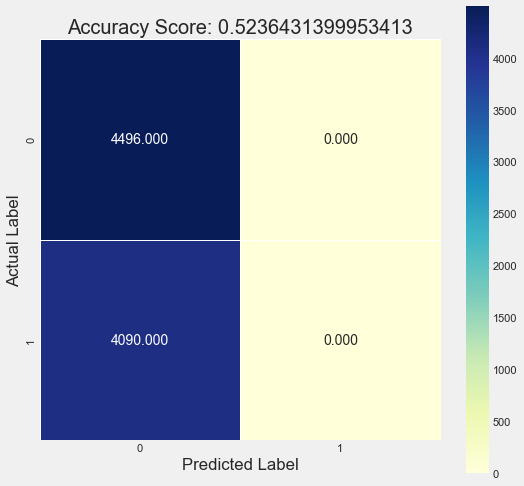

In [41]:
# Confusion Matrix

cm = confusion_matrix(y_test,base_predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot = True, fmt = '.3f', linewidths = .5, square = True, cmap="YlGnBu")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,base_predictions))
plt.title(all_sample_title, size = 20)

# Observations :

    1. 503 labels are wrongly classified in unsarcastic headlines
    2. 658 labels are wrongly classified in sarcastic headlines.

In [42]:
# Classification Report
print(classification_report(y_test, base_predictions, target_names = ['Unsarcastic','Sarcastic']))

              precision    recall  f1-score   support

 Unsarcastic       0.52      1.00      0.69      4496
   Sarcastic       0.00      0.00      0.00      4090

    accuracy                           0.52      8586
   macro avg       0.26      0.50      0.34      8586
weighted avg       0.27      0.52      0.36      8586



Observations :
    f1-score for unsarcatic is slightly better than sarcastic.

In [43]:
# Plotting History
def plot_history(history):
    # Storing Accuracies and Losses data of Training and Validation
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    # Features settings for plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.xlabel('Epoch ==>')
    plt.ylabel('Accuracy (%) ==>')
    plt.plot(x, acc, 'c', label='Training acc')
    plt.plot(x, val_acc, 'm', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.xlabel('Epoch ==>')
    plt.ylabel('Loss ==>')
    plt.plot(x, loss, 'c', label='Training loss')
    plt.plot(x, val_loss, 'm', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

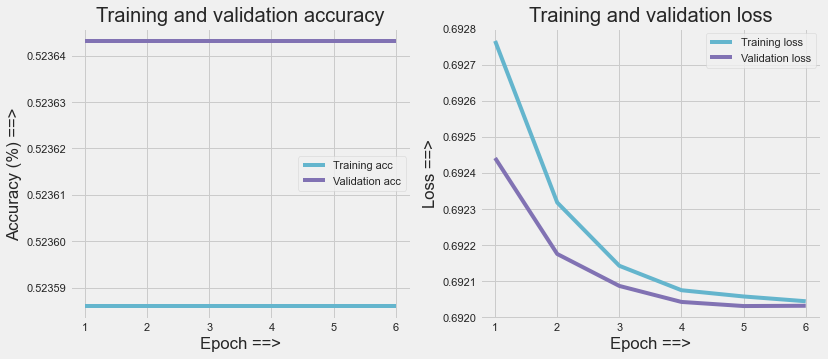

In [44]:
plot_history(base_history)

Observations : 
    1. The above base model is strongly overfitting.
    2. Training model has good learning rate but validation model has very high learning rate.

# Training a second model with extra dense layers, L2 penalties and different learning rate for optimizer for reducing the overfitting of model.

In [45]:
# Base Model Architechture
tf.keras.backend.clear_session() # Clear previous session
model = tf.keras.models.Sequential() # Model instantiation
model.add(tf.keras.layers.Embedding(num_words, embedding_dim, weights = [embedding_matrix], input_length=max_length)) #Input Layer
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))) # Bidirectional LSTM Layer
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(l=0.01))) # kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.01,l2=0.01)
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(l=0.01)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(16, activation='relu', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(l=0.01)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Output Layer

In [46]:
# Compiling the model
adam_opt = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(loss='binary_crossentropy',optimizer=adam_opt, metrics=['accuracy'])
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          3088600   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 256)         234496    
 l)                                                              
                                                                 
 global_average_pooling1d (G  (None, 256)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2

In [47]:
mc = tf.keras.callbacks.ModelCheckpoint('model_best.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
es = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", mode="max", patience=5)

In [48]:
history = model.fit(X_train, y_train, batch_size = batch_size, epochs = num_epochs, callbacks=[mc, es], validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
79/79 [==============================] - ETA: 0s - loss: 2.8257 - accuracy: 0.5236
Epoch 1: val_accuracy improved from -inf to 0.52364, saving model to model_best.hdf5
79/79 [==============================] - 71s 838ms/step - loss: 2.8257 - accuracy: 0.5236 - val_loss: 2.7067 - val_accuracy: 0.5236
Epoch 2/30
79/79 [==============================] - ETA: 0s - loss: 2.6022 - accuracy: 0.5236
Epoch 2: val_accuracy did not improve from 0.52364
79/79 [==============================] - 65s 828ms/step - loss: 2.6022 - accuracy: 0.5236 - val_loss: 2.4976 - val_accuracy: 0.5236
Epoch 3/30
79/79 [==============================] - ETA: 0s - loss: 2.4055 - accuracy: 0.5236
Epoch 3: val_accuracy did not improve from 0.52364
79/79 [==============================] - 63s 802ms/step - loss: 2.4055 - accuracy: 0.5236 - val_loss: 2.3131 - val_accuracy: 0.5236
Epoch 4/30
79/79 [==============================] - ETA: 0s - loss: 2.2316 - accuracy: 0.5236
Epoch 4: val_accuracy did not improve fro

In [49]:
model_best = tf.keras.models.load_model('model_best.hdf5')

In [50]:
# Predicting for all of test dataset 
predictions = model_best.predict(X_test, batch_size=1024).round().astype(int)
predictions[0]

9/9 [==============================] - 8s 812ms/step


array([0])

Text(0.5, 1.0, 'Accuracy Score: 0.5236431399953413')

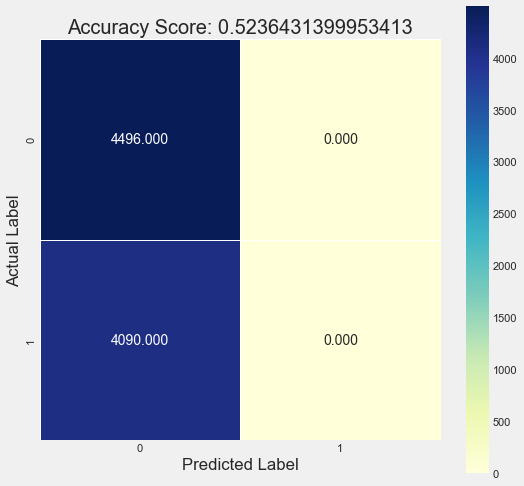

In [51]:
# Confusion Matrix

cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot = True, fmt = '.3f', linewidths = .5, square = True, cmap="YlGnBu")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,predictions))
plt.title(all_sample_title, size = 20)

Observations :
    1. 665 labels are wrongly classified in unsarcastic headlines
    2. 591 labels are wrongly classified in sarcastic headlines.

In [52]:
# Classification Report
print(classification_report(y_test, predictions, target_names = ['Unsarcastic','Sarcastic']))

              precision    recall  f1-score   support

 Unsarcastic       0.52      1.00      0.69      4496
   Sarcastic       0.00      0.00      0.00      4090

    accuracy                           0.52      8586
   macro avg       0.26      0.50      0.34      8586
weighted avg       0.27      0.52      0.36      8586



Observations : 
     f1-score for unsarcatic is slightly better than sarcastic. Also compared to previous model the f1-score has reduced by 0.01.

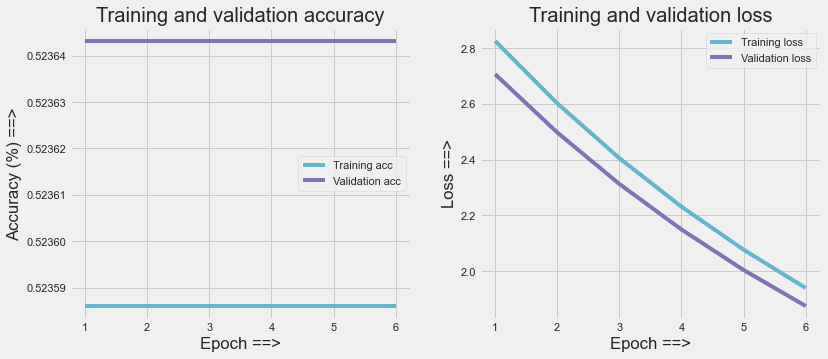

In [53]:
plot_history(history)

Observations : 
    1. This model is only little overfitting. Compared to the previous base model, this one has improved drastically.
    2. Training and Validation has good learning rate.
    3. This model is better amongst the two.

Conclusion:-
1. The first model is highly overfitting whereas second model is only little overfitting.
2. f1-score is only reducing by little in second model.
3. Difference between wronlgy classified labels has reduced in the second model.
4. To increase f1-score or accuracy further without overfiitting the model more data is necessary.